In [49]:
from nes_py.wrappers import JoypadSpace
import gym_super_mario_bros
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT
import matplotlib.pyplot as plt
import numpy as np
import torch
from torchinfo import summary
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
def run(env, steps=100):
    done = True
    for step in range(steps):
        if done:
            state = env.reset()
        state, reward, done, info = env.step(env.action_space.sample())
        env.render()

        
def runAndClose(env, steps=100):
    run(env, steps)
    env.close()
    

In [5]:
env = gym_super_mario_bros.make('SuperMarioBros-v0')
env = JoypadSpace(env, SIMPLE_MOVEMENT)
runAndClose(env, 5000)


In [3]:
import gym
from gym.spaces import Box
from gym.wrappers import FrameStack
from lib.image_utils import ImageUtils
from lib.env_wrappers import EnvWrapperFactory

In [5]:
env = gym_super_mario_bros.make('SuperMarioBros-v0')
env = JoypadSpace(env, [["right"], ["right", "A"]])
env.reset()

array([[[104, 136, 252],
        [104, 136, 252],
        [104, 136, 252],
        ...,
        [104, 136, 252],
        [104, 136, 252],
        [104, 136, 252]],

       [[104, 136, 252],
        [104, 136, 252],
        [104, 136, 252],
        ...,
        [104, 136, 252],
        [104, 136, 252],
        [104, 136, 252]],

       [[104, 136, 252],
        [104, 136, 252],
        [104, 136, 252],
        ...,
        [104, 136, 252],
        [104, 136, 252],
        [104, 136, 252]],

       ...,

       [[240, 208, 176],
        [228,  92,  16],
        [228,  92,  16],
        ...,
        [228,  92,  16],
        [228,  92,  16],
        [  0,   0,   0]],

       [[240, 208, 176],
        [228,  92,  16],
        [228,  92,  16],
        ...,
        [228,  92,  16],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[228,  92,  16],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [228,  92,  16]]

In [6]:
print(env.observation_space.shape[:2])

(240, 256)


In [7]:

next_state, reward, done, info = env.step(action=0)
print(f"{next_state.shape},\n {reward},\n {done},\n {info}")
# runAndClose(env)

(240, 256, 3),
 0,
 False,
 {'coins': 0, 'flag_get': False, 'life': 2, 'score': 0, 'stage': 1, 'status': 'small', 'time': 400, 'world': 1, 'x_pos': 40, 'y_pos': 79}


<class 'numpy.ndarray'>


RuntimeError: number of dims don't match in permute

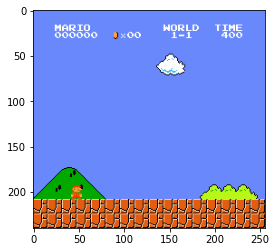

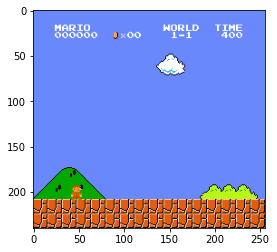

<Figure size 432x288 with 0 Axes>

In [42]:
%reload_ext autoreload
%autoreload 
print(type(next_state))
# plt.imshow(next_state.permute(1, 2, 0))
plt.imshow(next_state)
imgTensor = ImageUtils.permuteHWCtoCHWTensor(next_state)
grayTensor = ImageUtils.toTorchGray(imgTensor)
plt.figure()
plt.imshow(imgTensor.permute(1, 2, 0) / 255)
plt.figure()
plt.imshow(grayTensor.permute(1, 2, 0) / 255, cmap='gray')

In [41]:
print(grayTensor.shape)

torch.Size([1, 240, 256])


In [23]:
from torchvision import transforms as T

In [36]:
normalizer = T.Normalize(0, 255)
resizer = T.Resize((50, 50))

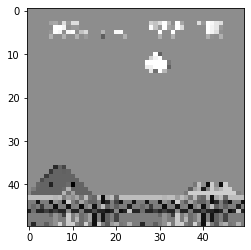

In [37]:
grayRe = resizer(grayTensor)
plt.figure()
plt.imshow(grayRe.permute(1, 2, 0) / 255, cmap='gray')

In [38]:
grayRe.min()

tensor(0.)

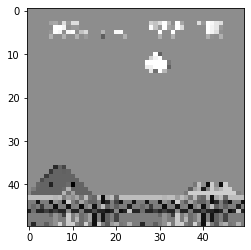

In [39]:
grayNorm = normalizer(grayRe)
plt.figure()
plt.imshow(grayNorm.permute(1, 2, 0) / 255, cmap='gray')

In [38]:
%reload_ext autoreload
%autoreload 
from lib.env_wrappers import EnvWrapperFactory
env = gym_super_mario_bros.make('SuperMarioBros2-v0')
env = JoypadSpace(env, [["right"], ["right", "A"]])
env = EnvWrapperFactory.convert(env, (50, 50))
env = FrameStack(env, num_stack=5)
print("final env state space", env.observation_space.shape)

env.reset()
next_state, reward, done, info = env.step(action=0)
print(f"{next_state.shape},\n {reward},\n {done},\n {info}")
print(type(next_state))
# runAndClose(env)


shape before any transformations: (240, 256, 3)
shape after grayscaler: (240, 256)
shape after resizer: (50, 50)
shape after all transformations: (50, 50)
final env state space (5, 50, 50)
(5, 50, 50),
 0,
 False,
 {'coins': 0, 'flag_get': False, 'life': 2, 'score': 0, 'stage': 1, 'status': 'small', 'time': 400, 'world': 1, 'x_pos': 40, 'y_pos': 79}
<class 'gym.wrappers.frame_stack.LazyFrames'>


In [40]:
stateArr = next_state.__array__()
type(stateArr)

numpy.ndarray

In [30]:
print(stateArr)

ValueError: only one element tensors can be converted to Python scalars

In [61]:
conv1 = torch.nn.Conv2d(64, 64, 3, 1)

In [62]:
summary(conv1, input_size=(1, 64, 9, 9))

Layer (type:depth-idx)                   Output Shape              Param #
Conv2d                                   [1, 64, 7, 7]             36,928
Total params: 36,928
Trainable params: 36,928
Non-trainable params: 0
Total mult-adds (M): 1.81
Input size (MB): 0.02
Forward/backward pass size (MB): 0.03
Params size (MB): 0.15
Estimated Total Size (MB): 0.19